In [1]:
#3 qubits grover search algorithm
#finding |101>
%matplotlib inline
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random, time
import numpy as np

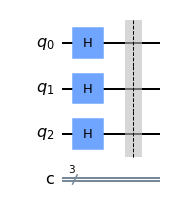

In [2]:
q = QuantumRegister(3,name='q')
c = ClassicalRegister(3, name = 'c')
circ_init = QuantumCircuit(q,c)
circ_init.h(q)
circ_init.barrier()
circ_init.draw(output = 'mpl')

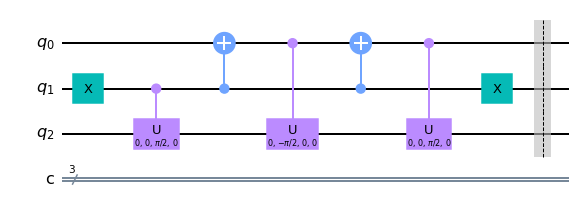

In [3]:
#building the Oracle
circ_oracle = QuantumCircuit(q,c)
circ_oracle.x(q[1])
circ_oracle.mcrz(np.pi,q[0:2],q[2]) #multicontrolled z gate
circ_oracle.x(q[1])
circ_oracle.barrier()
circ_oracle.draw(output='mpl')

In [4]:
circ = circ_init+circ_oracle
backend = Aer.get_backend('statevector_simulator')
job = execute(circ,backend)
sv = job.result().get_statevector(circ)
print(sv)

C:\Users\DHAIRYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  """Entry point for launching an IPython kernel.
C:\Users\DHAIRYA\Anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


[ 0.35355339+0.00000000e+00j  0.35355339+0.00000000e+00j
  0.35355339+1.67773407e-17j  0.35355339+0.00000000e+00j
  0.35355339+0.00000000e+00j -0.35355339+2.77555756e-17j
  0.35355339+0.00000000e+00j  0.35355339-2.77555756e-17j]


In [5]:
#implementing the Amplitude amplification
#first calculating the probability for just one iteration of complete oracle and diffuser

U = [[-3/4,1/4,1/4,1/4,1/4,1/4,1/4,1/4],
     [1/4,-3/4,1/4,1/4,1/4,1/4,1/4,1/4],
     [1/4,1/4,-3/4,1/4,1/4,1/4,1/4,1/4],
     [1/4,1/4,1/4,-3/4,1/4,1/4,1/4,1/4],
     [1/4,1/4,1/4,1/4,-3/4,1/4,1/4,1/4],
     [1/4,1/4,1/4,1/4,1/4,-3/4,1/4,1/4],
     [1/4,1/4,1/4,1/4,1/4,1/4,-3/4,1/4],
     [1/4,1/4,1/4,1/4,1/4,1/4,1/4,-3/4],]

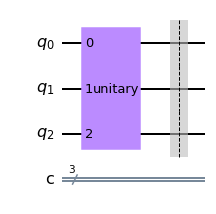

In [6]:
qc = QuantumCircuit(q,c)
qc.unitary(U,[0,1,2])
qc.barrier()
qc.draw(output='mpl')

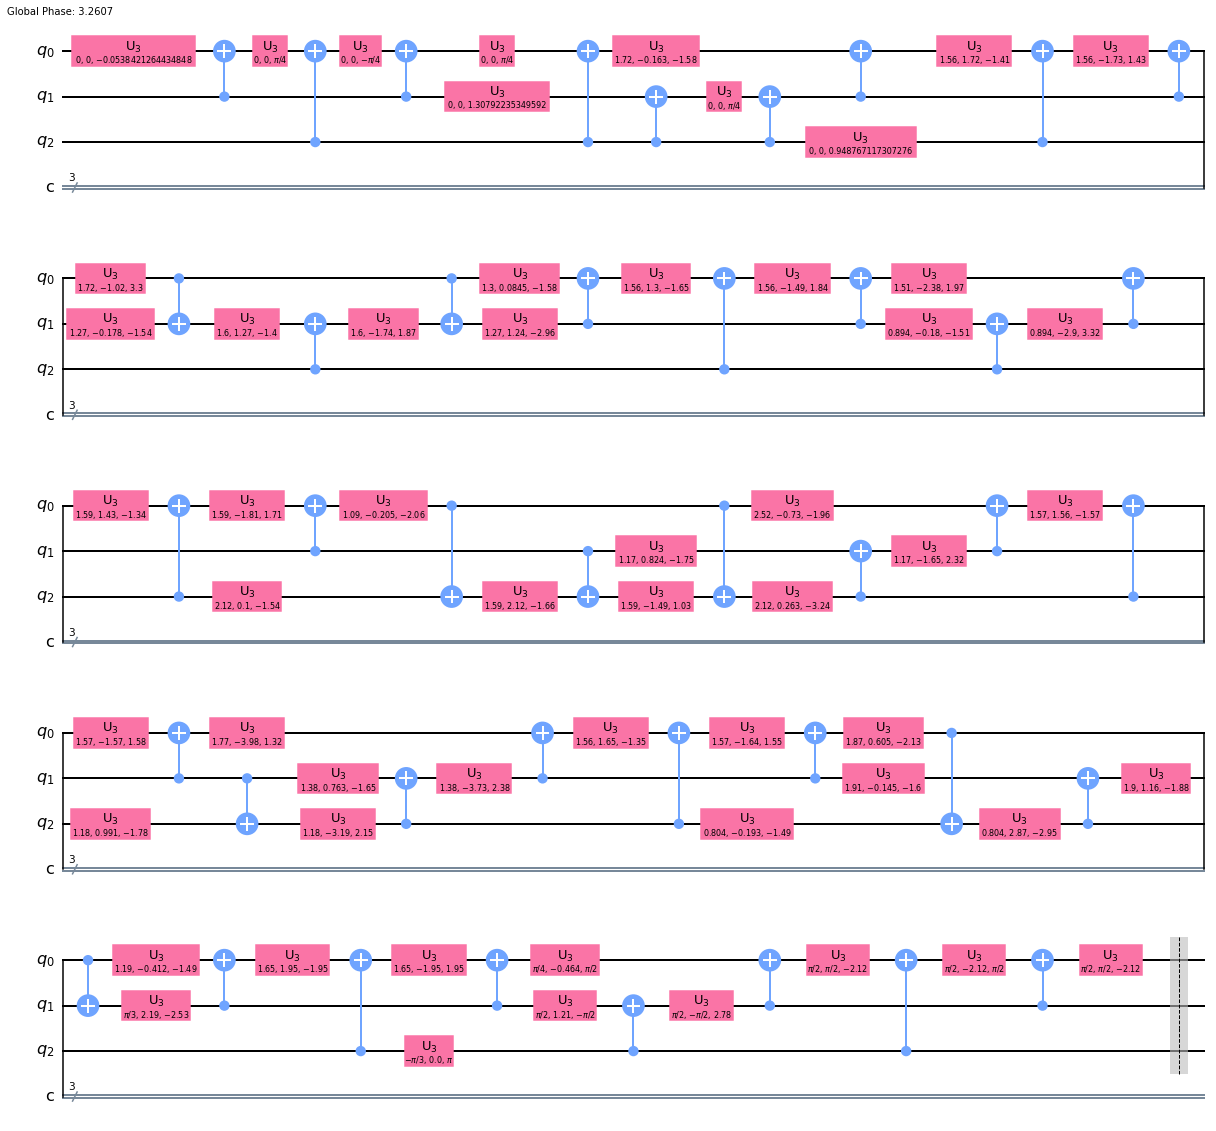

In [7]:
circ_diff = transpile(qc, basis_gates=['cx','u3'])
circ_diff.draw(output ='mpl')

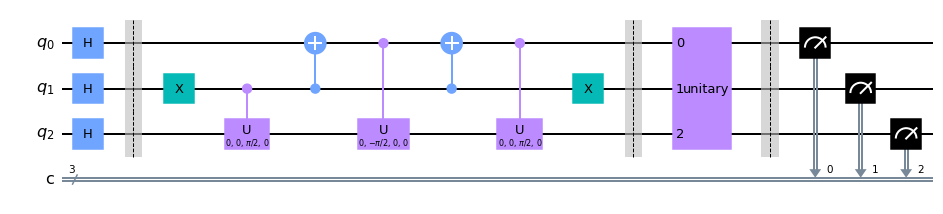

In [8]:
circ_final = circ + qc
circ_final.measure(q,c)
circ_final.draw(output='mpl')


In [9]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_final, backend, shots=1024)
counts_sim = job.result().get_counts(circ_final)
print(counts_sim)

{'101': 773, '011': 38, '111': 34, '110': 38, '100': 40, '000': 33, '001': 36, '010': 32}


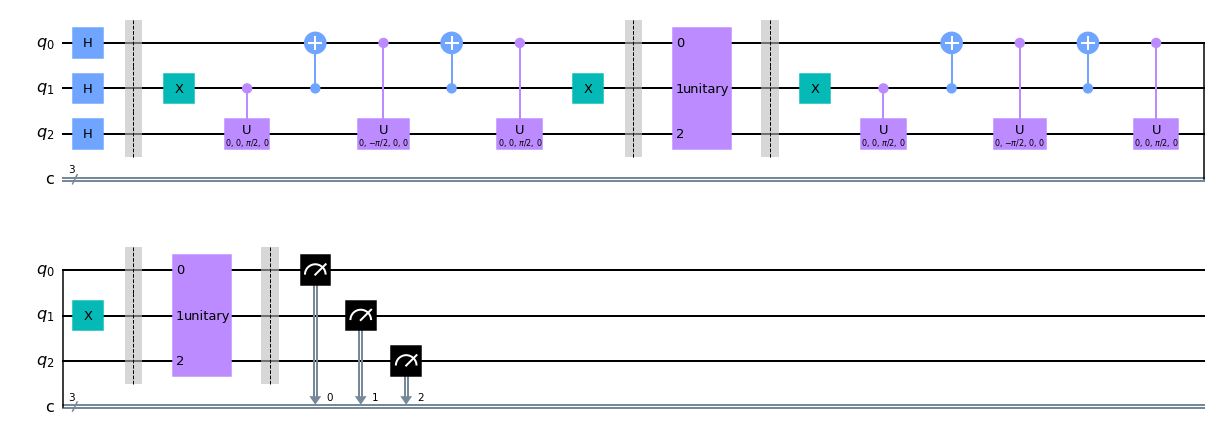

In [10]:
circ_final2 = circ_init+circ_oracle+qc+circ_oracle+qc
circ_final2.measure(q,c)
circ_final2.draw(output='mpl')

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_final2, backend, shots=1024)
counts_sim_it2 = job.result().get_counts(circ_final2)
print(counts_sim_it2)

{'101': 964, '110': 18, '001': 13, '011': 3, '111': 12, '010': 5, '000': 4, '100': 5}


ibmqfactory.load_account:WARNING:2021-07-07 18:26:43,698: Credentials are already in use. The existing account in the session will be replaced.


We are using... ibmq_quito
It has 9 pending jobs
Job Status: job has successfully run
{'000': 168, '001': 147, '010': 136, '011': 128, '100': 109, '101': 114, '110': 111, '111': 111}


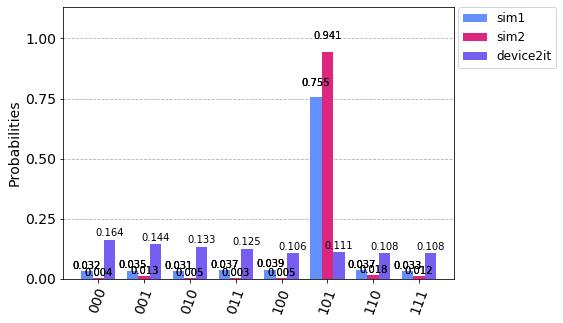

In [19]:

from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
# We choose the least busy device
backend = provider.get_backend('ibmq_quito') 
print("We are using...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
# We send both circuits at a time
job2 = execute(circ_final2, backend=backend, shots = 1024)
job_monitor(job2)
counts_dev = job2.result().get_counts(circ_final2)
print(counts_dev)
plot_histogram([counts_sim,counts_sim_it2,counts_dev],legend=['sim1','sim2','device2it'])

ibmqfactory.load_account:WARNING:2021-07-07 18:27:22,668: Credentials are already in use. The existing account in the session will be replaced.


We are using... ibmq_quito
It has 12 pending jobs
Job Status: job has successfully run
{'000': 156, '001': 179, '010': 97, '011': 96, '100': 78, '101': 223, '110': 95, '111': 100}


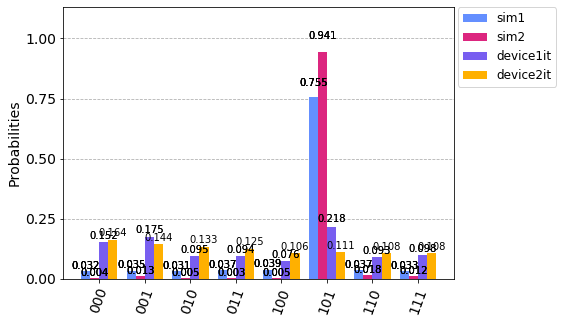

In [20]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
# We choose the least busy device
backend = provider.get_backend('ibmq_quito') 
print("We are using...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
# We send both circuits at a time
job3 = execute(circ_final, backend=backend, shots = 1024)
job_monitor(job3)
counts_dev1 = job3.result().get_counts(circ_final)
print(counts_dev1)
plot_histogram([counts_sim,counts_sim_it2,counts_dev1,counts_dev],legend=['sim1','sim2','device1it','device2it'])

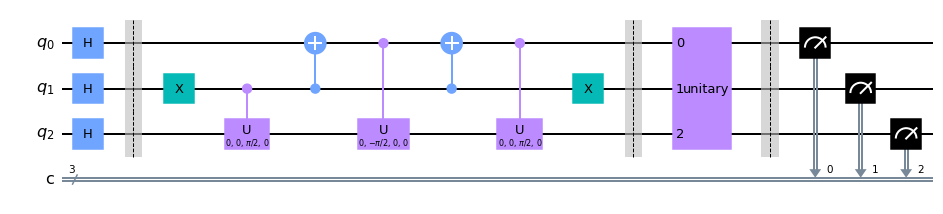

In [17]:
circ_final.draw(output='mpl')


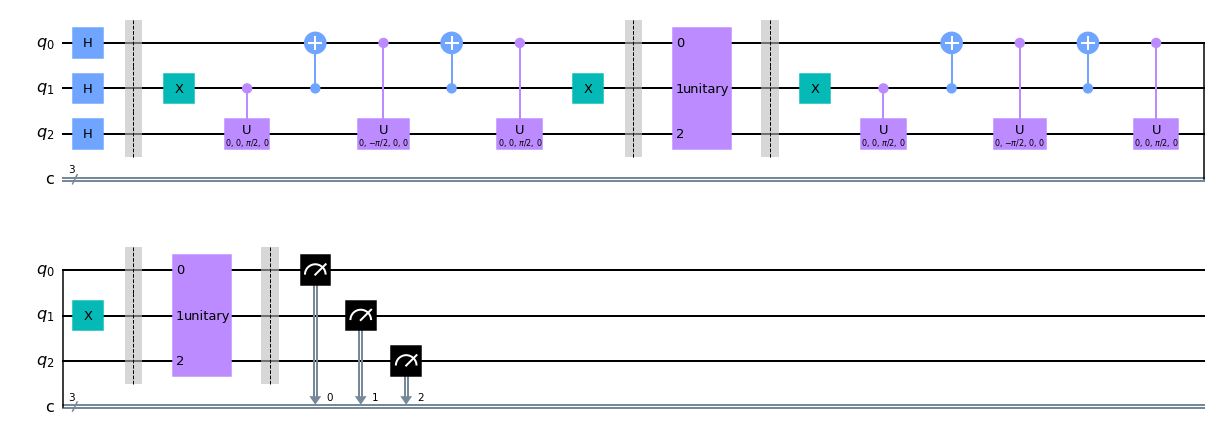

In [18]:
circ_final2.draw(output='mpl')